<a href="https://colab.research.google.com/github/rodrigorhp/Machine-Learning-Analysis/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías

In [1]:
import pandas as pd
import numpy as np 
from sklearn import metrics
import matplotlib.pyplot as plt

# Dataset

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
X = iris.data
df.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
22,4.6,3.6,1.0,0.2,0
4,5.0,3.6,1.4,0.2,0
143,6.8,3.2,5.9,2.3,2
37,4.9,3.6,1.4,0.1,0


In [3]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [4]:
df.shape

(150, 5)

In [5]:
df['target'].unique()

array([0, 1, 2])

# Conjunto de (Train/Test/Validation)

Se dividen los datos en sets de entramiento, validación y prueba con un 80%, 10% y 10% respectivamente de toda la base de datos, esto con el objetivo de tener la mayor cantidad de datos para entramiento, evitando underfitting, sin dejar muy pocos para la prueba y validación de rendimiento del modelo.

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1) 
y = df['target']   

train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))

print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("X_valid : ",X_valid.shape)

X_train :  (119, 4)
X_test :  (15, 4)
X_valid :  (16, 4)


# Implementación del Modelo

El modelo a implementar fue un Decision Tree mediante la librería Scikit Learn.
Primero se generó el modelo con los datos de entranamiento sin considerar alguna alteración para mejorar el rendiemiento del mismo. 

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion='gini') 

classifier = classifier.fit(X_train, y_train)

# Grado de bias o sesgo y Ajuste del modelo

Para determinar el ajuste del modelo nos fijaremos en la accuracy del modelo, puesto que al probar el modelo entrenado con los datos de entranamiento si el resultado de la accuracy es bajo, caemos en underfitting; asimismo, si al probar el modelo con datos de prueba el accuracy es bajo con un alto accuracy en con los datos de entrenamiento, caemos en un overfitting. 

In [8]:
# Prueba del modelo con los datos de entrenamiento: 
test_pred_train = classifier.predict(X_train)


print("Accuracy:" )

metrics.accuracy_score(y_train, test_pred_train) 

Accuracy:


1.0

Tener un accuracy alto en esta instancia nos indica que no caimos en un underfitting; sin embargo, aun el modelo es susceptible a tener un overfitting. 

In [9]:
# Prueba del modelo con los datos de prueba: 
test_pred_valid = classifier.predict(X_valid) 

print("Accuracy: " )

metrics.accuracy_score(y_valid, test_pred_valid)

Accuracy: 


0.9375

Una accuracy de 87.5% es un resultado favorable, lo que nos indica que el modelo actual no cae en underfitting u overfitting. 

In [10]:
1-metrics.accuracy_score(y_valid, test_pred_valid)

0.0625

Para medir el sesgo se puede observar el complemento de la accuracy que está relacionado con los valores no acertados del modelo. La accuracy se puede interpretar como la ausencia del bias; por lo tanto, el complemento nos indica el error que hubo, es decir, el bias que está afectando las predicciones del modleo. En este caso un bias de 0.125 es bajo. 

# Grado de varianza

Para medir el grado de varianza se utilizan dos parámetros importantes del modelo: la profundidad del árbol de decisión y el tamaño de las muestras. 

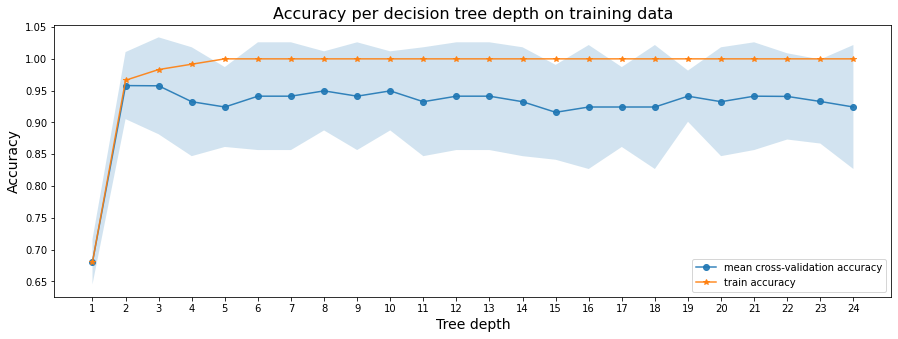

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

 La gráfica nos indica el rendimeinto del decision tree con muchas profunidades, esto nos ayuda a decidir la profundidad del modelo para alzanzar un resultado óptimo sin desperdiciar costo computacional. Como se puede observar, después de una proffundiad de 4 el modelo no tiene mucha variablidad en cuanto su rendimiento tanto para los datos de entrenamiento como los de prueba. 

>0, train: 1.000, test: 0.967
>1, train: 1.000, test: 0.940
>2, train: 1.000, test: 0.920


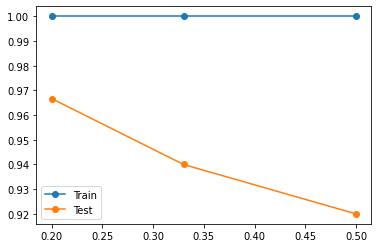

In [12]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

sizes = [0.2, 0.33, 0.5]


# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(len(sizes))]
# evaluate a decision tree for each depth
for i in range(len(values)):
	# configure the model

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sizes[i])

  model = DecisionTreeClassifier(criterion = 'gini')
	# fit model on the training dataset
  model.fit(X_train, y_train)
	# evaluate on the train dataset
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)

  train_scores.append(train_acc)
    # evaluate on the test dataset
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
    # summarize progress
  print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(sizes, train_scores, '-o', label='Train')
pyplot.plot(sizes, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

La gráfica nos muestra el rendiemiento del modelo considerado diferentes tamaños de muestras. Vemos que el rendimiento del modelo al probar con el conjunto de prueba decrece a medida hacemos el conjunto de entramiento más pequeño. La variablidad de este suceso se explica por utilizar cada vez menos datos de entrenamiento para construir el modelo ya que esto perjudica directamente las predicciones del modelo. 

# Implmentación del modelo final

Finalmente se implementa el modelo tomando en cosnsideración los parámetros para incrementar el rendimiento del modelo: 

- profundidad mayor o igual a 4
- tamaño del conjunto de prueba 33% de los datos

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1) 
y = df['target']   

train_ratio = 0.67
test_ratio = 0.33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

X_train :  (100, 4)
X_test :  (50, 4)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

clf = DecisionTreeClassifier(max_depth = 4,random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

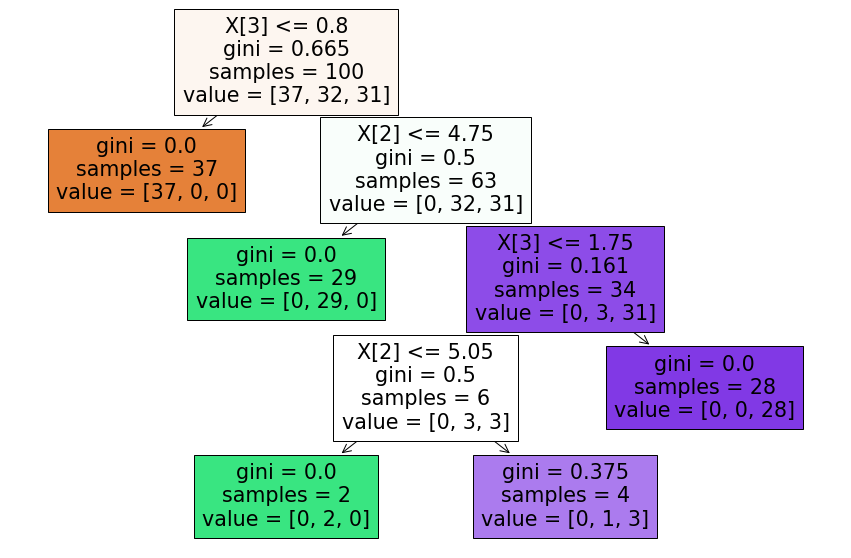

In [15]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf,   
                   filled=True)

# Métricas de Rendimiento

Se utilizaron métricas como accuracy, recall, f1-score y support para determinar el rendimiento del modelo. 

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.94      0.92        18
           2       0.94      0.89      0.92        19

    accuracy                           0.94        50
   macro avg       0.95      0.95      0.95        50
weighted avg       0.94      0.94      0.94        50



In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


El modelo cumple con estandares aceptables para ser un buen modelo. 
- Mantiene una accuracy de 94%
- Recall del 100%
- F1-Score del 100%

Al considerar los nuevos parámetros óptimos del modelo se puede notar aumento del 0.025%. Esta mejora apesar de no ser realmente significativa se puede considerar como un aumento decente para modelos más complejos o inclusive uan diferencia favorable al utilizar el modelo para predecir grandes bases de datos. 


In [18]:
y_test=y_test.to_list()

In [19]:
for i in range(len(y_test)):
  print('Predicción: ', y_pred[i], ' | Valor Esperado: ', y_test[i])

Predicción:  1  | Valor Esperado:  1
Predicción:  2  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  2
Predicción:  0  | Valor Esperado:  0
Predicción:  2  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  2
Predicción:  1  | Valor Esperado:  1
Predicción:  1  | Valor Esperado:  1
Predicción:  2  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  2
Predicción:  0  | Valor Esperado:  0
Predicción:  1  | Valor Esperado:  1
Predicción:  1  | Valor Esperado:  1
Predicción:  0  | Valor Esperado:  0
Predicción:  0  | Valor Esperado:  0
Predicción:  1  | Valor Esperado:  1
Predicción:  2  | Valor Esperado:  2
Predicción:  2  | Valor Esperado:  2
Predicción:  1  | Valor Esperado:  1
Predicción:  1  | Valor Esperado:  1
Predicción:  0  | Valor Esperado:  0
Predicción:  2  | Valor Esperado:  2
Predicción:  0  | Valor Esperado:  0
Predicción:  2  | Valor Esperado:  2
Predicción:  0  | Valor Esperado:  0
Predicción:  0  | Valor Esperado:  0
P